In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [34]:
def f(x):
    #enter the expression here
    f=6*np.exp(-2*x)+2*x**2
    return f

def df(x):
    df=-12*np.exp(-2*x)+4*x
    # df=2*x+2
    return df

def ddf(x):
    ddf=24*np.exp(-2*x)+4
    return ddf

def f2(v1,v2):
    #write the expression here
    # f=(3 - v1)**2 + 7*(v2 - v1**2)**2
    f=((v1-2)**4)+((v1-2*v2)**2)
    return f

### Golden search method

In [35]:
def golden_search(l,a,b):
    print("a,b ={}, {} ".format(a,b))
    global count
    count+=1
    # print(type(a),type(b))
    alpha=0.618
    if b-a>=l:
        lamda=a+((1-alpha)*(b-a))
        mu=a+alpha*(b-a)
        print("lamda,mu = {}, {}".format(lamda,mu))
        print("f(lamda), f(mu)= {}, {}".format(f(lamda),f(mu)))
        print("----------------------------------------")
        if f(lamda)>f(mu):
            i,j,o=golden_search(l,lamda,b)
            return i,j,(i+j)/2
        else:
            i,j,o=golden_search(l,a,mu)
            return i,j,(i+j)/2
    else:
        print("Number of iterations= {}".format(count))
        return (a,b,(a+b)/2)

In [36]:
count=0
_,_,optima=golden_search(0.0001,-3,5)
print("The optima with Golden search method= {}".format(optima))


a,b =-3, 5 
lamda,mu = 0.05600000000000005, 1.944
f(lamda), f(mu)= 5.3705375450021435, 7.681189665887878
----------------------------------------
a,b =-3, 1.944 
lamda,mu = -1.111392, 0.055391999999999886
f(lamda), f(mu)= 57.86838309278039, 5.376929006792605
----------------------------------------
a,b =-1.111392, 1.944 
lamda,mu = 0.05576774399999995, 0.7768402560000001
f(lamda), f(mu)= 5.37297797207784, 2.4757709372251004
----------------------------------------
a,b =0.05576774399999995, 1.944 
lamda,mu = 0.777072465792, 1.2226952782079998
f(lamda), f(mu)= 2.475903481615629, 3.510121107105107
----------------------------------------
a,b =0.05576774399999995, 1.2226952782079998 
lamda,mu = 0.501534062067456, 0.7769289601405439
f(lamda), f(mu)= 2.703587657459722, 2.4758215114273683
----------------------------------------
a,b =0.501534062067456, 1.2226952782079998 
lamda,mu = 0.7770176466331438, 0.9472116936423121
f(lamda), f(mu)= 2.4758721469471845, 2.696850198167273
-----------------

### Dichotomous search method

In [37]:
def dichotomous_search(l,epslon,a,b):
    print("a,b ={}, {} ".format(a,b))
    global count
    count+=1
    # print(type(a),type(b))
    alpha=0.5
    if b-a>=l:
        lamda=a+((1-alpha)*(b-a))-epslon
        mu=a+alpha*(b-a)+epslon
        print("lamda,mu = {}, {}".format(lamda,mu))
        print("f(lamda), f(mu)= {}, {}".format(f(lamda),f(mu)))
        print("----------------------------------------")
        if f(lamda)>f(mu):
            i,j,o=dichotomous_search(l,epslon,lamda,b)
            return i,j,(i+j)/2
        else:
            i,j,o=dichotomous_search(l,epslon,a,mu)
            return i,j,(i+j)/2
    else:
        print("Number of iterations= {}".format(count))
        return (a,b,(a+b)/2)

In [38]:
count=0
_,_,optima=dichotomous_search(0.002,0.0002,-3,5)
print("The optima with Dichotomous search method= {}".format(optima))

a,b =-3, 5 
lamda,mu = 0.9998, 1.0002
f(lamda), f(mu)= 2.8115366490690423, 2.8124870396921837
----------------------------------------
a,b =-3, 1.0002 
lamda,mu = -1.0001000000000002, -0.9997000000000003
f(lamda), f(mu)= 46.34360436764848, 46.30654415021257
----------------------------------------
a,b =-1.0001000000000002, 1.0002 
lamda,mu = -0.00015000000000011654, 0.00024999999999988345
f(lamda), f(mu)= 6.001800315027003, 5.997000874875017
----------------------------------------
a,b =-0.00015000000000011654, 1.0002 
lamda,mu = 0.49982499999999996, 0.5002249999999999
f(lamda), f(mu)= 2.707699390316583, 2.706733697240732
----------------------------------------
a,b =0.49982499999999996, 1.0002 
lamda,mu = 0.7498125, 0.7502125
f(lamda), f(mu)= 2.463720668208217, 2.463849690186229
----------------------------------------
a,b =0.49982499999999996, 0.7502125 
lamda,mu = 0.62481875, 0.6252187499999999
f(lamda), f(mu)= 2.500448982756648, 2.500073841264945
-----------------------------------

### Fibonacci search method

In [39]:
def fibonacci(n):
    if n < 1:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)

In [40]:
def fibonacci_search(a,b,l,eps,n,k):
    print("a,b ={}, {} ".format(a,b))
    lamda=float(a+(fibonacci(n-2)/fibonacci(n))*(b-a))
    mu=float(a+(fibonacci(n-1)/fibonacci(n))*(b-a))
    print("lamda,mu = {}, {}".format(lamda,mu))
    print("f(lamda), f(mu)= {}, {}".format(f(lamda),f(mu)))
    print("----------------------------------------")
    if f(lamda) > f(mu):
        a=lamda
        lamda=mu
        mu=a+(fibonacci(n-k-1)/fibonacci(n-k))*(b-a)
    else:
        b=mu
        mu=lamda
        lamda=a+(fibonacci(n-k-2)/fibonacci(n-k))*(b-a)

    if k==n-2:
        print("Number of iterations= {}".format(k))
        mu_k=lamda+eps
        if f(lamda)>f(mu):
            # print("fibonacci_search Solution: ",(lamda+b)/2)
            return (lamda+b)/2
        else:
            # print("fibonacci_search Solution: ",(a+mu)/2)
            return (a+mu)/2
    else:
        k += 1
        o=fibonacci_search(a,b,l,eps,n,k)
        return o

In [41]:
o=fibonacci_search(-3,5,0.0001,0.001,27,1)
print("The optima with Fibonacci search method= {}".format(o))

a,b =-3, 5 
lamda,mu = 0.05572809009357593, 1.9442719099064236
f(lamda), f(mu)= 5.373394772295574, 7.683237358300704
----------------------------------------
a,b =-3, 1.9442719099064236 
lamda,mu = -1.1114561799797908, 0.05572808988621425
f(lamda), f(mu)= 57.87577975875776, 5.373394774475247
----------------------------------------
a,b =-1.1114561799797908, 1.9442719099064236 
lamda,mu = 0.055728090014370624, 0.7770876399122617
f(lamda), f(mu)= 5.373394773128137, 2.4759121599712426
----------------------------------------
a,b =0.055728090014370624, 1.9442719099064236 
lamda,mu = 0.7770876399914668, 1.2229123599293275
f(lamda), f(mu)= 2.475912160016547, 3.510957117866959
----------------------------------------
a,b =0.055728090014370624, 1.2229123599293275 
lamda,mu = 0.5015528100011826, 0.7770876399425154
f(lamda), f(mu)= 2.70354276040673, 2.4759121599885474
----------------------------------------
a,b =0.5015528100011826, 1.2229123599293275 
lamda,mu = 0.7770876399727691, 0.9473775299

### Bisection search method

In [42]:
def bisection_search(l,a,b):
    a=float(a)
    b=float(b)
    print("a,b ={}, {} ".format(a,b))
    global count
    count+=1
    # print(count)
    # print(a,b)
    global n
    if count==1:
        n=np.ceil(np.log(l/(b-a))/np.log(0.5))
    else:
        pass
    if count==n:
        print("Number of iterations= {}".format(count))
        return a,b,(a+b)/2
    else:
        lamda=(b+a)/2
        print("lamda= {}".format(lamda))
        dl=df(lamda)
        print("df(lamda)= {}".format(dl))
        print("----------------------------------------")
        if dl==0:
            print("Number of iterations= {}".format(count))
            return lamda,lamda,lamda
        elif dl>0:
            p,q,o=bisection_search(l,a,lamda)
            return p,q,(p+q)/2
        elif dl<0:
            p,q,o=bisection_search(l,lamda,b)
            return p,q,(p+q)/2

In [43]:
count=0
n=0
a,b,o=bisection_search(0.0001,-3,5)
print("The optima with Bisection search method= {}".format(o))

a,b =-3.0, 5.0 
lamda= 1.0
df(lamda)= 2.3759766011606476
----------------------------------------
a,b =-3.0, 1.0 
lamda= -1.0
df(lamda)= -92.6686731871678
----------------------------------------
a,b =-1.0, 1.0 
lamda= 0.0
df(lamda)= -12.0
----------------------------------------
a,b =0.0, 1.0 
lamda= 0.5
df(lamda)= -2.414553294057308
----------------------------------------
a,b =0.5, 1.0 
lamda= 0.75
df(lamda)= 0.3224380782188421
----------------------------------------
a,b =0.5, 0.75 
lamda= 0.625
df(lamda)= -0.9380575623222809
----------------------------------------
a,b =0.625, 0.75 
lamda= 0.6875
df(lamda)= -0.28407514965695757
----------------------------------------
a,b =0.6875, 0.75 
lamda= 0.71875
df(lamda)= 0.02475017085450215
----------------------------------------
a,b =0.6875, 0.71875 
lamda= 0.703125
df(lamda)= -0.128226470946311
----------------------------------------
a,b =0.703125, 0.71875 
lamda= 0.7109375
df(lamda)= -0.0513847328541317
-------------------------------

### Newton's method

In [44]:
def newton_method(l,p):
    lamda=p
    count=0
    while True:
        count+=1
        print("lamda= {}".format(lamda))
        olamda=lamda
        dl=df(lamda)
        ddl=ddf(lamda)
        print("df(lamda), ddf(lamda)= {}, {}".format(dl,ddl))
        lamda=lamda-(dl/ddl)
        print("Updated lamda= {}".format(lamda))
        print("----------------------------------------")
        dist = np.linalg.norm(olamda-lamda)
        if dist<l:
            print("Number of iterations= {}".format(count))
            return lamda
        if abs(dl)<l:
            print("Number of iterations= {}".format(count))
            return lamda

In [45]:
o=newton_method(0.0001,5)
print("The optima with Newton's method= {}".format(o))

lamda= 5
df(lamda), ddf(lamda)= 19.99945520084285, 4.0010895983143
Updated lamda= 0.0014977896848833439
----------------------------------------
lamda= 0.0014977896848833439
df(lamda), ddf(lamda)= -11.95811567607643, 27.928213669631926
Updated lamda= 0.42967109921091395
----------------------------------------
lamda= 0.42967109921091395
df(lamda), ddf(lamda)= -3.3626019700579177, 14.162572733803147
Updated lamda= 0.6670998512647042
----------------------------------------
lamda= 0.6670998512647042
df(lamda), ddf(lamda)= -0.49202696982859084, 10.320852749774815
Updated lamda= 0.7147729439594261
----------------------------------------
lamda= 0.7147729439594261
df(lamda), ddf(lamda)= -0.013919664103314577, 9.746022879882037
Updated lamda= 0.7162011844093894
----------------------------------------
lamda= 0.7162011844093894
df(lamda), ddf(lamda)= -1.1709991747377302e-05, 9.72963289525861
Updated lamda= 0.7162023879482972
----------------------------------------
Number of iterations= 6
The

### Cyclic cordinate method

In [46]:
def rang(x,y,j):
    if j==0:
        l=x-2
        u=x+2
        return l,u,y
    elif j==1:
        l=y-2
        u=y+2
        return l,u,x

In [47]:
def golden_search(l,a,b,c,j):
    # print(a,b)
    # print(type(a),type(b))
    alpha=0.618
    if j==0:
        if abs(b-a)>=0.0001:
            lamda=a+((1-alpha)*(b-a))
            mu=a+alpha*(b-a)
            if f2(lamda,c)>f2(mu,c):
                i,j,o,c=golden_search(l,lamda,b,c,j)
                return i,j,(i+j)/2,c
            else:
                i,j,o,c=golden_search(l,a,mu,c,j)
                return i,j,(i+j)/2,c
        else:
            return (a,b,(a+b)/2,c)
    elif j==1:
        if abs(b-a)>=0.0001:
            lamda=a+((1-alpha)*(b-a))
            mu=a+alpha*(b-a)
            if f2(c,lamda)>f2(c,mu):
                i,j,c,o=golden_search(l,lamda,b,c,j)
                return i,j,c,(i+j)/2
            else:
                i,j,c,o=golden_search(l,a,mu,c,j)
                return i,j,c,(i+j)/2
        else:
            return (a,b,c,(a+b)/2)

In [48]:
def cyclic_cordinate(l,x,y):
    global count
    count+=1
    ox,oy=x,y
    nx,ny=x,y

    if count<10 or count>926:
        print("f(xk= {}".format(f2(x,y)))
        print("Intial point= ({},{})".format(x,y))
    for j in range(2):
        k,n,m=rang(nx,ny,j)
        nox,noy=nx,ny
        _,_,nx,ny=golden_search(l,k,n,m,j)
        if count<10 or count>926:
            if j==0:
                print("lamda{}= {}".format(j+1,nx-nox))
            else:    
                print("lamda{}= {}".format(j+1,ny-noy))
            print("point after updating= ({},{})".format(nx,ny))
            
    if count<10 or count>926:
        print("----------------------------------------")
    dist=((((nx-ox)**2)+((ny-oy)**2) )**0.5)
    if dist<l:
        print("Number of iterations= {}".format(count))
        return nx,ny
    else:
        p,q=cyclic_cordinate(l,nx,ny)
        return p,q

In [49]:
count=0
print("printing the results first 9 and last 9 iterations because of too many iterations")
print("----------------------------------------")
x,y=cyclic_cordinate(0.0003,0,0)
print("The optima with Newton's method= ({},{})".format(x,y))


printing the results first 9 and last 9 iterations because of too many iterations
----------------------------------------
f(xk= 16
Intial point= (0,0)
lamda1= 1.1648643892763975
point after updating= (1.1648643892763975,0)
lamda2= 0.5824501833513548
point after updating= (1.1648643892763975,0.5824501833513548)
----------------------------------------
f(xk= 0.4864385798244254
Intial point= (1.1648643892763975,0.5824501833513548)
lamda1= 0.30241939678875474
point after updating= (1.4672837860651522,0.5824501833513548)
lamda2= 0.15120253046394017
point after updating= (1.4672837860651522,0.733652713815295)
----------------------------------------
f(xk= 0.0805348147096286
Intial point= (1.4672837860651522,0.733652713815295)
lamda1= 0.13031142048830668
point after updating= (1.5975952065534589,0.733652713815295)
lamda2= 0.06515009722891507
point after updating= (1.5975952065534589,0.79880281104421)
----------------------------------------
f(xk= 0.026221201225695136
Intial point= (1.5975952

### Hooke and Jeeve's method 

In [50]:
def rang(x,y,j):
    if j==0:
        l=x-2
        u=x+2
        return l,u,y
    elif j==1:
        l=y-2
        u=y+2
        return l,u,x

In [51]:
def golden_search(l,a,b,c,j):
    # print(a,b)
    # print(type(a),type(b))
    alpha=0.618
    if j==0:
        if abs(b-a)>=0.0001:
            lamda=a+((1-alpha)*(b-a))
            mu=a+alpha*(b-a)
            if f2(lamda,c)>f2(mu,c):
                i,j,o,c=golden_search(l,lamda,b,c,j)
                return i,j,(i+j)/2,c
            else:
                i,j,o,c=golden_search(l,a,mu,c,j)
                return i,j,(i+j)/2,c
        else:
            return (a,b,(a+b)/2,c)
    elif j==1:
        if abs(b-a)>=0.0001:
            lamda=a+((1-alpha)*(b-a))
            mu=a+alpha*(b-a)
            if f2(c,lamda)>f2(c,mu):
                i,j,c,o=golden_search(l,lamda,b,c,j)
                return i,j,c,(i+j)/2
            else:
                i,j,c,o=golden_search(l,a,mu,c,j)
                return i,j,c,(i+j)/2
        else:
            return (a,b,c,(a+b)/2)

In [52]:
def Golden_search_cross(l,lx,ly,ux,uy):
    alpha=0.618
    if ((((lx-ux)**2)+((ly-uy)**2) )**0.5)>=l:
        lamdax=lx+((1-alpha)*(ux-lx))
        lamday=ly+((1-alpha)*(uy-ly))
        mux=lx+alpha*(ux-lx)
        muy=ly+alpha*(uy-ly)
        if f2(lamdax,lamday)>f2(mux,muy):
            nx,ny=Golden_search_cross(l,lamdax,lamday,ux,uy)
            return nx,ny
        else :
            nx,ny=Golden_search_cross(l,lx,ly,mux,muy)
            return nx,ny
    else:
        return (ux+lx)/2,(uy+ly)/2

In [53]:
def hooke_and_jeeves(l,x,y):
    global count
    count+=1
    ox,oy=x,y
    nx,ny=x,y
    if count==1:
        global lox,loy
        lox,loy=x,y
    lamda=[]
    print("f(xk)= {}".format(f2(lox,loy)))
    # if count%50==0:
    #     print("Intial point= ({},{})".format(x,y))
    print("Intial point= ({},{})".format(x,y))
    for j in range(2):
        k,n,m=rang(nx,ny,j)
        nox,noy=nx,ny
        _,_,nx,ny=golden_search(l,k,n,m,j)
        # if count%50==0:
        #     print("lamda= {},{}".format(nx-nox,ny-noy))
        #     print("point after updating= ({},{})".format(nx,ny))
        if j==0:
            print("lamda{}= {}".format(j+1,nx-nox))
        else:
            print("lamda{}= {}".format(j+1,ny-noy))
        print("point after updating= ({},{})".format(nx,ny))
    dist=((((nx-lox)**2)+((ny-loy)**2) )**0.5)
    if dist<l:
        print("----------------------------------------")
        print("Number of iterations= {}".format(count))
        return nx,ny
    else:
        d1,d2=nx-lox,ny-loy
        lox,loy=nx,ny
        lx=nx-2*(1/np.sqrt(1+(d2/d1)**2))
        ux=nx+2*(1/np.sqrt(1+(d2/d1)**2))
        cap=2*(1/np.sqrt(1+(d2/d1)**2))/d1
        ly=ny-d2*cap
        uy=ny+d2*cap
        nox,noy=nx,ny
        nx,ny=Golden_search_cross(l,lx,ly,ux,uy)
        cap=(nx-nox)/d1
        print("d= ({},{})".format(d1,d2))
        print("lamda cap= {}".format(cap))
        # print((nx-nox)/d1,(ny-noy)/d2)
        print("point after updating= ({},{})".format(nx,ny))
        print("----------------------------------------")
        p,q=hooke_and_jeeves(l,nx,ny)
        return p,q


count=0
lox,loy=0,0
x,y=hooke_and_jeeves(0.0001,0,0)
print("The optima with hook and jeeve's method= ({},{})".format(x,y))


f(xk)= 16
Intial point= (0,0)
lamda1= 1.1648643892763975
point after updating= (1.1648643892763975,0)
lamda2= 0.5824501833513548
point after updating= (1.1648643892763975,0.5824501833513548)
d= (1.1648643892763975,0.5824501833513548)
lamda cap= 0.7160872021190449
point after updating= (1.9990088706414428,0.9995353055211509)
----------------------------------------
f(xk)= 0.4864385798244254
Intial point= (1.9990088706414428,0.9995353055211509)
lamda1= 5.562771239420172e-05
point after updating= (1.999064498353837,0.9995353055211509)
lamda2= 1.0318148572774355e-05
point after updating= (1.999064498353837,0.9995456236697237)
d= (0.8342001090774396,0.41709544031836887)
lamda cap= 0.0017528152836124688
point after updating= (2.000526697054619,1.0002767149322391)
----------------------------------------
f(xk)= 7.162741420331473e-10
Intial point= (2.000526697054619,1.0002767149322391)
lamda1= 1.032581700277646e-05
point after updating= (2.000537022871622,1.0002767149322391)
lamda2= 1.03181485

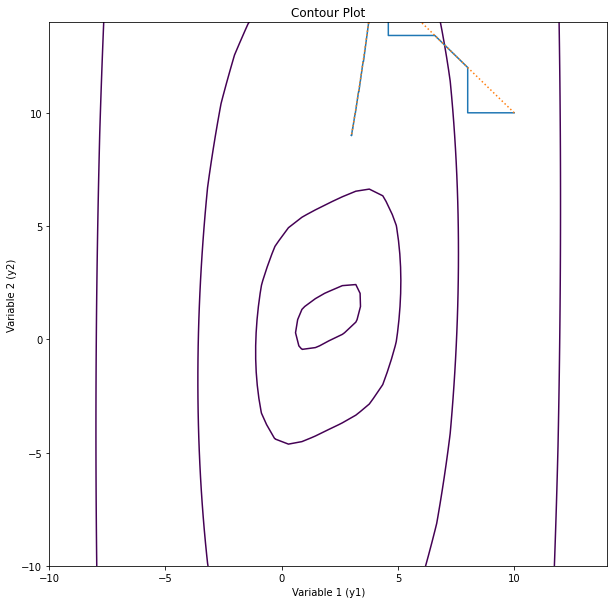

In [54]:
feature_x = np.linspace(-20.0, 20.0, 70)
feature_y = np.linspace(-20.0, 20.0, 70)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
  
Z = f2(X,Y)
  
# plots filled contour plot
ax.contour(X, Y, Z,[5,100,1000,10000,100000,1000000])
  
ax.set_title('Contour Plot')
ax.set_xlabel('Variable 1 (y1)')
ax.set_ylabel('Variable 2 (y2)')
ax.plot(points_x,points_y)
ax.plot(p_x,p_y,linestyle='dotted')
plt.xlim([-10,14])
plt.ylim([-10,14])  
plt.show()

### Rosenbrock's method

In [55]:
def rang(x,y,j):
    if j==0:
        l=x-10
        u=x+10
        return l,u,y
    elif j==1:
        l=y-10
        u=y+10
        return l,u,x

In [56]:
def golden_search(l,a,b,c,j):
    alpha=0.618
    if j==0:
        if abs(b-a)>=l:
            lamda=a+((1-alpha)*(b-a))
            mu=a+alpha*(b-a)
            if f2(lamda,c)>f2(mu,c):
                i,j,o,c=golden_search(l,lamda,b,c,j)
                return i,j,(i+j)/2,c
            else:
                i,j,o,c=golden_search(l,a,mu,c,j)
                return i,j,(i+j)/2,c
        else:
            return (a,b,(a+b)/2,c)
    elif j==1:
        if abs(b-a)>=0.0001:
            lamda=a+((1-alpha)*(b-a))
            mu=a+alpha*(b-a)
            if f2(c,lamda)>f2(c,mu):
                i,j,c,o=golden_search(l,lamda,b,c,j)
                return i,j,c,(i+j)/2
            else:
                i,j,c,o=golden_search(l,a,mu,c,j)
                return i,j,c,(i+j)/2
        else:
            return (a,b,c,(a+b)/2)

In [57]:
def Golden_search_cross(l,lx,ly,ux,uy):
    alpha=0.618
    if ((((lx-ux)**2)+((ly-uy)**2) )**0.5)>=l:
        lamdax=lx+((1-alpha)*(ux-lx))
        lamday=ly+((1-alpha)*(uy-ly))
        mux=lx+alpha*(ux-lx)
        muy=ly+alpha*(uy-ly)
        if f2(lamdax,lamday)>f2(mux,muy):
            nx,ny=Golden_search_cross(l,lamdax,lamday,ux,uy)
            return nx,ny
        else :
            nx,ny=Golden_search_cross(l,lx,ly,mux,muy)
            return nx,ny
    else:
        return (ux+lx)/2,(uy+ly)/2

In [58]:
def dvector(lambda_lst,d_i):
    a_j,b_j = [[0,0],[0,0]],[[0,0],[0,0]]
    nd_i=[[0,0],[0,0]]
    for i in range(0,2):
        if lambda_lst[i] == 0:
            a_j[i] =  d_i[i]
        else:
            for k in range(i,2):
                a_j[i] += np.multiply(lambda_lst[k],d_i[k])

        if i == 0:
            b_j[i] = a_j[i]
            nd_i[i] =b_j[i]/np.linalg.norm(b_j[i])
        else:
            for k in range(0,i):
                a_j[i] -= np.multiply(np.dot(a_j[i].T,nd_i[k]),nd_i[k])
            b_j[i] = a_j[i]
            nd_i[i] =b_j[i]/np.linalg.norm(b_j[i])
    return nd_i

In [59]:
def rosenbrocks(l,x,y,d):
    # print(d)
    global count
    global lamda
    count+=1
    ox,oy=x,y
    nx,ny=x,y
    print("f(xk)= {}".format(f2(x,y)))
    print("Intial point= ({},{})".format(x,y))
    if count==1:
        nox,noy=nx,ny
        for j in range(2):
            k,n,m=rang(nx,ny,j)
            nox,noy=nx,ny
            _,_,nx,ny=golden_search(l,k,n,m,j)
            lamb=[nx-nox,ny-noy]
            lamda[j]=lamb[j]
            print("d= {}".format(d[j]))
            print("lamda= {}".format(lamda[j]))
            print("point after updating= ({},{})".format(nx,ny))
    else:

        for j in range(2):
            nox,noy=nx,ny

            p=d[j]
            d1,d2=p[0],p[1]
            lx=nx-2*(1/np.sqrt(1+(d2/d1)**2))
            ux=nx+2*(1/np.sqrt(1+(d2/d1)**2))
            cap=2*(1/np.sqrt(1+(d2/d1)**2))/d1
            ly=ny-d2*cap
            uy=ny+d2*cap
            nx,ny=Golden_search_cross(l,lx,ly,ux,uy)
            try:
                lamda[j]=(nx-nox)/d1
                if type(lamda[j])!='int':
                    lamda[j]=(ny-noy)/d2
            except:
                lamda[j]=(ny-noy)/d2
            print("d= {}".format(d[j]))
            print("lamda= {}".format(lamda[j]))
            print("point after updating= ({},{})".format(nx,ny))

    # print("lamda= {}".format(lamda))
    dist=((((nx-ox)**2)+((ny-oy)**2) )**0.5)
    if dist<l:
        print("----------------------------------------")
        print("Number of iterations= {}".format(count))
        return nx,ny
    else:
        nd=dvector(lamda,d)
        # print("new d vector is {}".format(nd))
        print("----------------------------------------")
        p,q=rosenbrocks(l,nx,ny,nd)
        return p,q

In [60]:
count=0
d=np.random.rand(2,2)
for j in range(2):
    for i in range(2):
        if i==j:
            d[i,j]=1
        else:
            d[i,j]=0
lamda=[0 for j in range(len(d))]

In [61]:
x,y=rosenbrocks(0.0003,0,0,d)
print("The optima with Rosenbrock's method= ({},{})".format(x,y))

f(xk)= 16
Intial point= (0,0)
d= [1. 0.]
lamda= 1.1648614456630075
point after updating= (1.1648614456630075,0)
d= [0. 1.]
lamda= 0.5824218878079651
point after updating= (1.1648614456630075,0.5824218878079651)
----------------------------------------
f(xk)= 0.4864454371041738
Intial point= (1.1648614456630075,0.5824218878079651)
d= [0.8944299  0.44720817]
lamda= 0.9329967315234309
point after updating= (1.999361623180687,0.9996656472057133)
d= [-0.44720817  0.8944299 ]
lamda= -1.0321982787722109e-05
point after updating= (1.9993662392557034,0.9996564149156337)
----------------------------------------
f(xk)= 2.8527279434599553e-09
Intial point= (1.9993662392557034,0.9996564149156337)
d= [0.89443485 0.44719827]
lamda= -0.0004020470034969252
point after updating= (1.9990066344036062,0.9994766201899921)
d= [ 0.44719827 -0.89443485]
lamda= 1.0321982787722854e-05
point after updating= (1.9990112503764825,0.9994673878488443)
----------------------------------------
f(xk)= 5.849332248887652e-